In [1091]:
import pandas as pd
import matplotlib.pyplot as plt

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.rename(columns={'Sex': 'Gender'} , inplace=True)
test.rename(columns={'Sex': 'Gender'} , inplace=True)

In [1092]:
train.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [1093]:
train = train.drop(['Ticket' , 'Cabin'] , axis = 1)
test = test.drop(['Ticket' , 'Cabin'] , axis = 1)

In [1094]:
train.isnull().sum().sort_values(ascending=False)

Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
SibSp            0
Parch            0
Fare             0
dtype: int64

In [1095]:
#preencher embarked com o valor que mais aparece (moda)
mode = train['Embarked'].dropna().mode()[0]
mode


'S'

In [1096]:
train['Embarked'].fillna(mode , inplace=True)

In [1097]:
train.isnull().sum().sort_values(ascending=False)

Age            177
PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

In [1098]:
test.isnull().sum().sort_values(ascending=False)

Age            86
Fare            1
PassengerId     0
Pclass          0
Name            0
Gender          0
SibSp           0
Parch           0
Embarked        0
dtype: int64

In [1099]:
#preencher fare com a mediana
media = test['Fare'].dropna().median()
media

14.4542

In [1100]:
test['Fare'].fillna(media , inplace = True)
test.isnull().sum().sort_values(ascending=False)

Age            86
PassengerId     0
Pclass          0
Name            0
Gender          0
SibSp           0
Parch           0
Fare            0
Embarked        0
dtype: int64

In [1101]:
combine = pd.concat([train,test] , axis = 0).reset_index(drop = True)
combine.head(5)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [1102]:
combine.isnull().sum().sort_values(ascending=False)
#survived ta no test

Survived       418
Age            263
PassengerId      0
Pclass           0
Name             0
Gender           0
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

In [1103]:
#enconde nos valores categoricos
combine['Gender'] = combine['Gender'].map({'male':0 , 'female':1})
combine.head(2)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C


C:\Users\bxand\AppData\Local\Temp\ipykernel_9764\1152429163.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(combine.drop(['Survived','Name','PassengerId','Fare'],axis = 1).corr() , annot = True , cmap='coolwarm')


<Axes: >

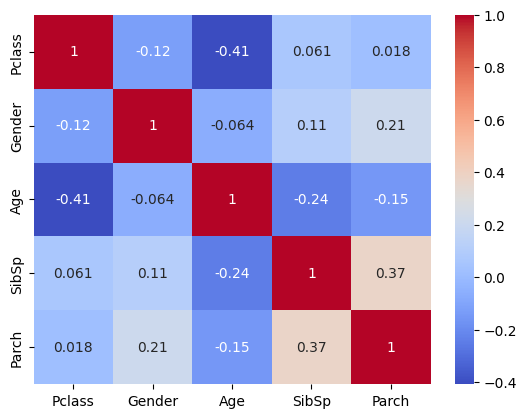

In [1104]:
import seaborn as sns
sns.heatmap(combine.drop(['Survived','Name','PassengerId','Fare'],axis = 1).corr() , annot = True , cmap='coolwarm')

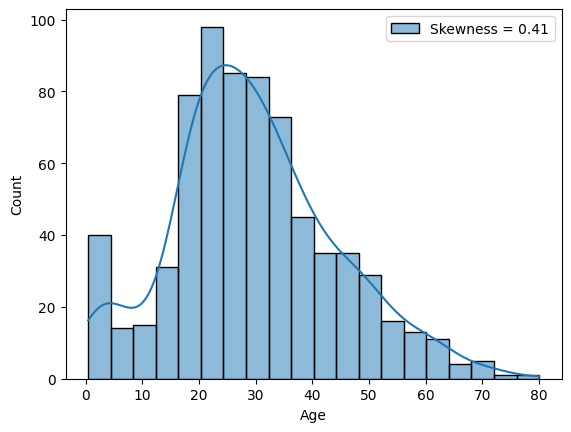

In [1105]:
sns.histplot(data=combine.dropna(), x='Age', kde=True, label=f"Skewness = {combine['Age'].dropna().skew():.2f}")
plt.legend()

In [1106]:
mean = combine['Age'].mean()
combine.head(6)


,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,S
5,6,0.0,3,"Moran, Mr. James",0,NaN,0,0,8.4583,Q


In [1107]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

df_cleaned = combine.drop(['PassengerId','Name','Embarked','Survived'], axis=1)
# Assuming you have a DataFrame called 'df'
df_cleaned.dropna(subset=['Age'], inplace=True)


# Select relevant columns for training the decision tree
features = ['Pclass', 'Gender', 'SibSp', 'Parch','Fare']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_cleaned[features], df_cleaned['Age'], test_size=0.2, random_state=42)

# Create a decision tree regressor
tree_model = DecisionTreeRegressor(random_state=42)

# Fit the model on the training data
tree_model.fit(X_train, y_train)

# Predict the missing ages using the trained model
predicted_ages = tree_model.predict(combine[combine['Age'].isnull()][features])

# Fill in the missing age values with the predicted values
combine.loc[combine['Age'].isnull(), 'Age'] = predicted_ages

# Check the updated DataFrame with filled-in ages
combine.isnull().sum().sort_values(ascending=True)
#combine.head(6)



PassengerId      0
Pclass           0
Name             0
Gender           0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
Survived       418
dtype: int64

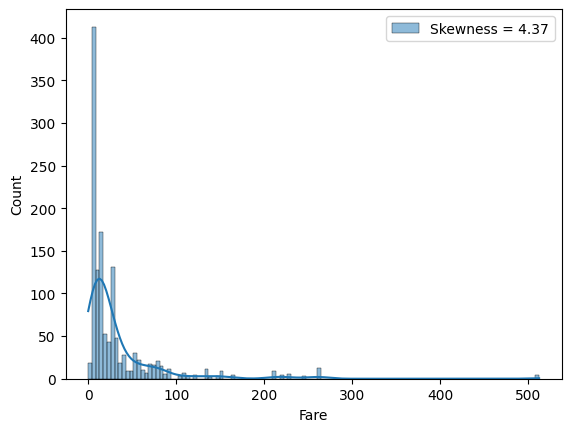

In [1108]:
#data transformation - colocar isso antes do ml model ^
sns.histplot(combine['Fare'], kde=True, label=f"Skewness = {combine['Fare'].dropna().skew():.2f}")
plt.legend()

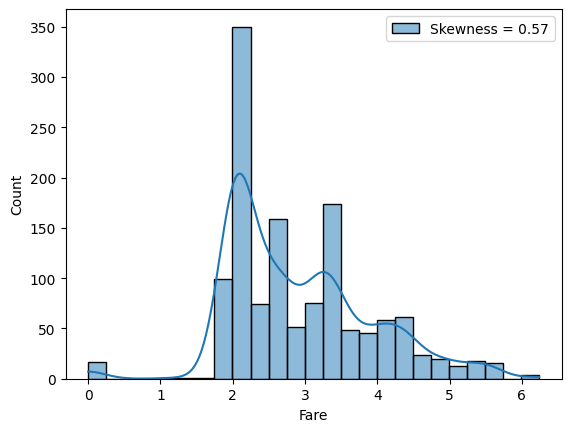

In [1109]:
import numpy as np

combine['Fare'] = combine['Fare'].map(lambda x: np.log(x) if x>0 else 0)
#fare_values = combine['Fare'].values
#fare_normalized = (fare_values - np.mean(fare_values)) / np.std(fare_values)
#combine['Fare'] = fare_normalized

sns.histplot(combine['Fare'], kde=True, label=f"Skewness = {combine['Fare'].dropna().skew():.2f}")
plt.legend()

In [1110]:
#feature engineering
combine.head(2)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,1.981001,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,4.266662,C


In [1111]:

combine['Title'] = [name.split(',')[1].strip().split('.')[0].strip() for name in combine['Name']]

combine[['Name','Title']].head()

,Name,Title
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr


In [1112]:
combine['Title'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: Title, dtype: int64

<Axes: xlabel='Title', ylabel='count'>

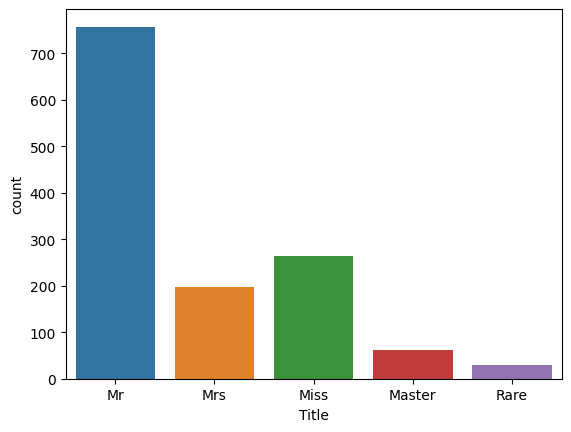

In [1113]:
combine['Title'].replace('Mme','Mrs',inplace=True,regex=True)
combine['Title'].replace(['Mlle','Ms'],'Miss',inplace=True,regex=True)
combine['Title'].replace(['Dona','Jonkheer','the Countess','Capt','Don','Sir','Lady','Major','Col','Dr','Rev'],'Rare',inplace=True,regex=True)

sns.countplot(data=combine, x='Title')

In [1114]:
combine[['Title','Survived']].groupby('Title',as_index=False).mean().sort_values(by='Survived',ascending=False)

,Title,Survived
3,Mrs,0.793651
1,Miss,0.702703
0,Master,0.575000
4,Rare,0.347826
2,Mr,0.156673


In [1115]:
combine.drop('Name',axis=1,inplace=True)
combine.head(9)

,PassengerId,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0.0,3,0,22.0,1,0,1.981001,S,Mr
1,2,1.0,1,1,38.0,1,0,4.266662,C,Mrs
2,3,1.0,3,1,26.0,0,0,2.070022,S,Miss
3,4,1.0,1,1,35.0,1,0,3.972177,S,Mrs
4,5,0.0,3,0,35.0,0,0,2.085672,S,Mr
5,6,0.0,3,0,21.0,0,0,2.135148,Q,Mr
6,7,0.0,1,0,54.0,0,0,3.948596,S,Mr
7,8,0.0,3,0,2.0,3,1,3.048088,S,Master
8,9,1.0,3,1,27.0,0,2,2.409941,S,Mrs


In [1116]:
combine = pd.get_dummies(combine , columns=['Title','Embarked'])
combine.head(9)

,PassengerId,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Embarked_C,Embarked_Q,Embarked_S
0,1,0.0,3,0,22.0,1,0,1.981001,0,0,1,0,0,0,0,1
1,2,1.0,1,1,38.0,1,0,4.266662,0,0,0,1,0,1,0,0
2,3,1.0,3,1,26.0,0,0,2.070022,0,1,0,0,0,0,0,1
3,4,1.0,1,1,35.0,1,0,3.972177,0,0,0,1,0,0,0,1
4,5,0.0,3,0,35.0,0,0,2.085672,0,0,1,0,0,0,0,1
5,6,0.0,3,0,21.0,0,0,2.135148,0,0,1,0,0,0,1,0
6,7,0.0,1,0,54.0,0,0,3.948596,0,0,1,0,0,0,0,1
7,8,0.0,3,0,2.0,3,1,3.048088,1,0,0,0,0,0,0,1
8,9,1.0,3,1,27.0,0,2,2.409941,0,0,0,1,0,0,0,1


In [1117]:
train = combine[:len(train)]
test = combine[len(train):]

In [1118]:
train = train.drop('PassengerId', inplace=False, axis=1)
train['Survived'] = train['Survived'].astype('int')
train.head()

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,1.981001,0,0,1,0,0,0,0,1
1,1,1,1,38.0,1,0,4.266662,0,0,0,1,0,1,0,0
2,1,3,1,26.0,0,0,2.070022,0,1,0,0,0,0,0,1
3,1,1,1,35.0,1,0,3.972177,0,0,0,1,0,0,0,1
4,0,3,0,35.0,0,0,2.085672,0,0,1,0,0,0,0,1


In [1119]:
test = test.drop('Survived',axis = 1)
bruh = test['PassengerId']
test = test.drop('PassengerId',axis =1 )
test.head()

,Pclass,Gender,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Embarked_C,Embarked_Q,Embarked_S
891,3,0,34.5,0,0,2.057860,0,0,1,0,0,0,1,0
892,3,1,47.0,1,0,1.945910,0,0,0,1,0,0,0,1
893,2,0,62.0,0,0,2.270836,0,0,1,0,0,0,1,0
894,3,0,27.0,0,0,2.159003,0,0,1,0,0,0,0,1
895,3,1,22.0,1,1,2.508582,0,0,0,1,0,0,0,1


In [1120]:
x_train = train.drop('Survived',axis = 1)
y_train = train['Survived']
x_test = test.copy()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

(891, 14)
(891,)
(418, 14)


In [1121]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=9999)
logreg.fit(x_train,y_train)
acc_log = logreg.score(x_train,y_train)
print(acc_log)

0.8305274971941639


In [1122]:
from sklearn.svm import SVC
svc = SVC(max_iter=9999)
svc.fit(x_train,y_train)
acc_svc = svc.score(x_train,y_train)
print(acc_svc)

0.7384960718294051


In [1123]:
from sklearn.svm import LinearSVC
linear_svc = LinearSVC(max_iter=1000000)
linear_svc.fit(x_train,y_train)
acc_linearsvc = linear_svc.score(x_train,y_train)
print(acc_linearsvc)

0.8361391694725028


In [1124]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(x_train,y_train)
acc_tree = tree.score(x_train,y_train)
print(acc_tree)

0.9831649831649831


In [1125]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(x_train,y_train)
acc_forest = forest.score(x_train,y_train)
print(acc_forest)

0.9831649831649831


In [1126]:
import xgboost as xgb
model = xgb.XGBClassifier()
model.fit(x_train, y_train)
acc_xgb = model.score(x_train,y_train)
print(acc_xgb)

0.9674523007856342


In [1127]:
models = pd.DataFrame({'Model' : ['reg' , 'svc' , 'lin_svc' , 'tree' , 'forest' , 'xgb'], 
                       'Score' : [acc_log,acc_svc,acc_linearsvc,acc_tree,acc_forest,acc_xgb]})

models.sort_values(by='Score',ascending=False,ignore_index=True)

,Model,Score
0,tree,0.983165
1,forest,0.983165
2,xgb,0.967452
3,lin_svc,0.836139
4,reg,0.830527
5,svc,0.738496


In [1128]:
classifier = []
classifier.append(LogisticRegression(max_iter=9999))
classifier.append(SVC(max_iter=9999))
classifier.append(LinearSVC(max_iter=1000000))
classifier.append(DecisionTreeClassifier())
classifier.append(RandomForestClassifier())
classifier.append(xgb.XGBClassifier())


In [1129]:
from sklearn.model_selection import cross_val_score
cv_result = []
for classifierx in classifier:
    cv_result.append(cross_val_score(classifierx,x_train,y_train,scoring='accuracy',cv=5))

In [1130]:
cv_mean = []
cv_std = []
for aux in cv_result:
    cv_mean.append(aux.mean())
    cv_std.append(aux.std())

In [1131]:
cv_res = pd.DataFrame({'cv_mean':cv_mean, 'cv_std':cv_std,'algo':['log','svc','lin_svc','tree','forest','xgb']})
cv_res.sort_values(by='cv_mean',ascending=False)

,cv_mean,cv_std,algo
0,0.824914,0.026218,log
2,0.823790,0.029014,lin_svc
4,0.812573,0.024999,forest
5,0.811456,0.017166,xgb
3,0.792386,0.040876,tree
1,0.720583,0.023874,svc


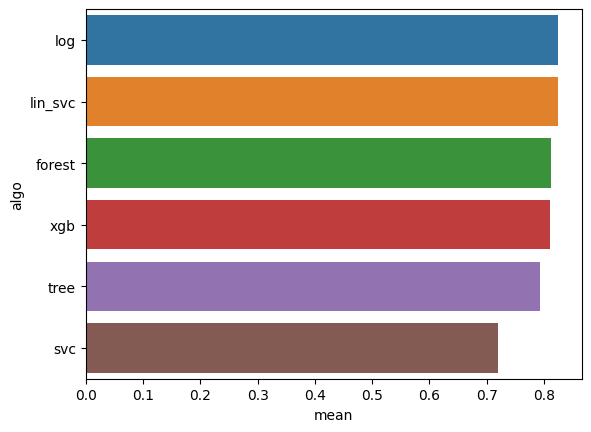

In [1132]:
sns.barplot(x='cv_mean', y='algo', data=cv_res.sort_values(by='cv_mean',ascending=False), )
plt.xlabel('mean')
plt.ylabel('algo')
plt.show()


In [1133]:
from sklearn.model_selection import GridSearchCV
grid = {'n_estimators':[100,150,200],
        'max_depth':[3,4],
        'learning_rate': [0.1,0.2,0.3],
        'gamma':[0,5,20]
        }

tuner = GridSearchCV(xgb.XGBClassifier(),grid,refit=True,verbose=3)

tuner.fit(x_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV 1/5] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100;, score=0.827 total time=   0.0s
[CV 2/5] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100;, score=0.809 total time=   0.0s
[CV 3/5] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100;, score=0.837 total time=   0.0s
[CV 4/5] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100;, score=0.798 total time=   0.0s
[CV 5/5] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100;, score=0.848 total time=   0.0s
[CV 1/5] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=150;, score=0.849 total time=   0.0s
[CV 2/5] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=150;, score=0.803 total time=   0.0s
[CV 3/5] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=150;, score=0.871 total time=   0.0s
[CV 4/5] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=150;, score=0.798 total time=   0.0s
[C

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'gamma': [0, 5, 20], 'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [3, 4], 'n_estimators': [100, 150, 200]},
             verbose=3)

In [1134]:
tuner.best_params_

{'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}

In [1135]:
tuner.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [1136]:
tuner.score(x_train,y_train)


0.9113355780022446

In [1137]:
cross_val_score(tuner,x_train,y_train,scoring='accuracy',cv=5,verbose=1).mean()

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV 1/5] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100;, score=0.790 total time=   0.0s
[CV 2/5] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100;, score=0.832 total time=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 3/5] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100;, score=0.824 total time=   0.0s
[CV 4/5] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100;, score=0.838 total time=   0.0s
[CV 5/5] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100;, score=0.824 total time=   0.0s
[CV 1/5] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=150;, score=0.804 total time=   0.0s
[CV 2/5] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=150;, score=0.839 total time=   0.0s
[CV 3/5] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=150;, score=0.824 total time=   0.0s
[CV 4/5] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=150;, score=0.831 total time=   0.0s
[CV 5/5] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=150;, score=0.824 total time=   0.0s
[CV 1/5] END gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200;, score=0.790 total time=   0.0s
[CV 2/5] END gamma=0, learning_rate=0.1, max_depth=3, n_estimato

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.1min finished


0.8271420500910175

In [1138]:
y_pred = tuner.predict(x_test)
y_pred.shape

(418,)

In [1139]:
test.head()

,Pclass,Gender,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Embarked_C,Embarked_Q,Embarked_S
891,3,0,34.5,0,0,2.057860,0,0,1,0,0,0,1,0
892,3,1,47.0,1,0,1.945910,0,0,0,1,0,0,0,1
893,2,0,62.0,0,0,2.270836,0,0,1,0,0,0,1,0
894,3,0,27.0,0,0,2.159003,0,0,1,0,0,0,0,1
895,3,1,22.0,1,1,2.508582,0,0,0,1,0,0,0,1


In [1140]:

submit = pd.DataFrame({'PassengerId':bruh,'Survived':y_pred})
submit

,PassengerId,Survived
891,892,0
892,893,0
893,894,0
894,895,0
895,896,0
...,...,...
1304,1305,0
1305,1306,1
1306,1307,0
1307,1308,0


In [1142]:
submit.to_csv('titanic.csv',index=False)